In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import pwlf

In [2]:
df = pd.read_csv('green_supply_chain.csv')

# Apply one-hot encoding for 'Product_Type' and drop the original column
X = pd.get_dummies(df.drop(columns=['Sustainability_Score']), columns=['Product_Type'], drop_first=True)

# Target variable remains the same
y = df['Sustainability_Score']

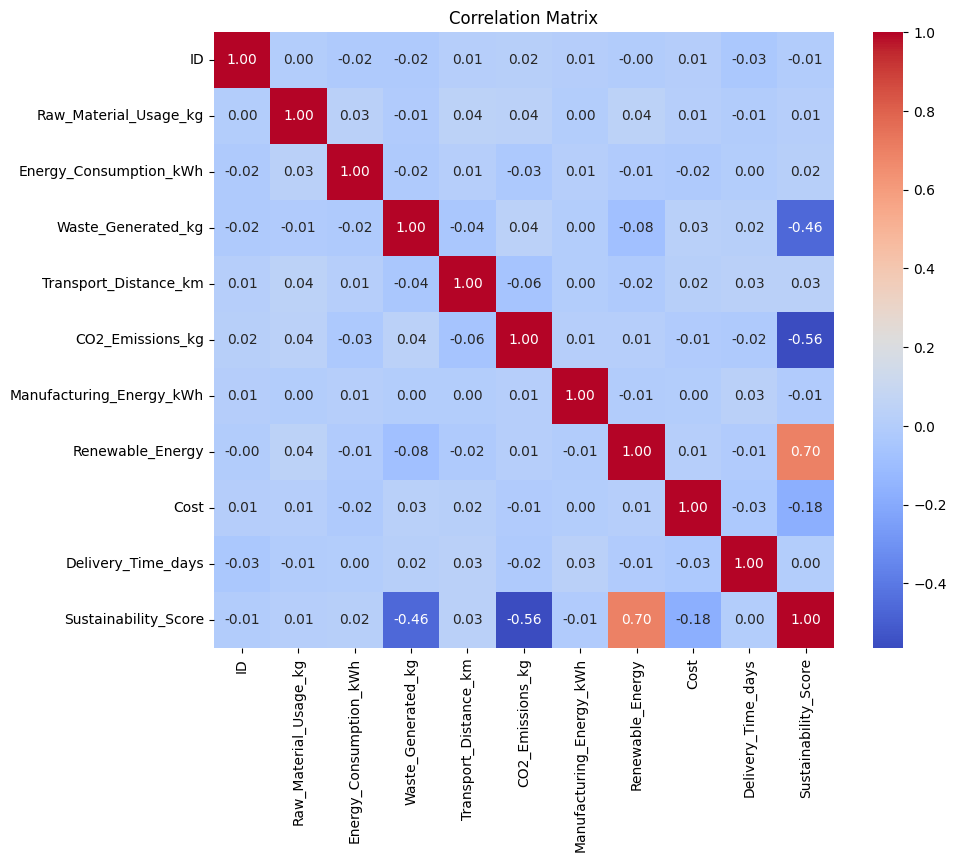

ID                         -0.006894
Raw_Material_Usage_kg       0.010697
Energy_Consumption_kWh      0.018185
Waste_Generated_kg         -0.464005
Transport_Distance_km       0.033640
CO2_Emissions_kg           -0.564297
Manufacturing_Energy_kWh   -0.012399
Renewable_Energy            0.700514
Cost                       -0.178919
Delivery_Time_days          0.000545
Sustainability_Score        1.000000
Name: Sustainability_Score, dtype: float64


In [3]:
df_cor =df.drop(columns=['Product_Type'])
corr_matrix = df_cor.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Display correlations with the target variable 'Sustainability_Score'
print(corr_matrix['Sustainability_Score'])


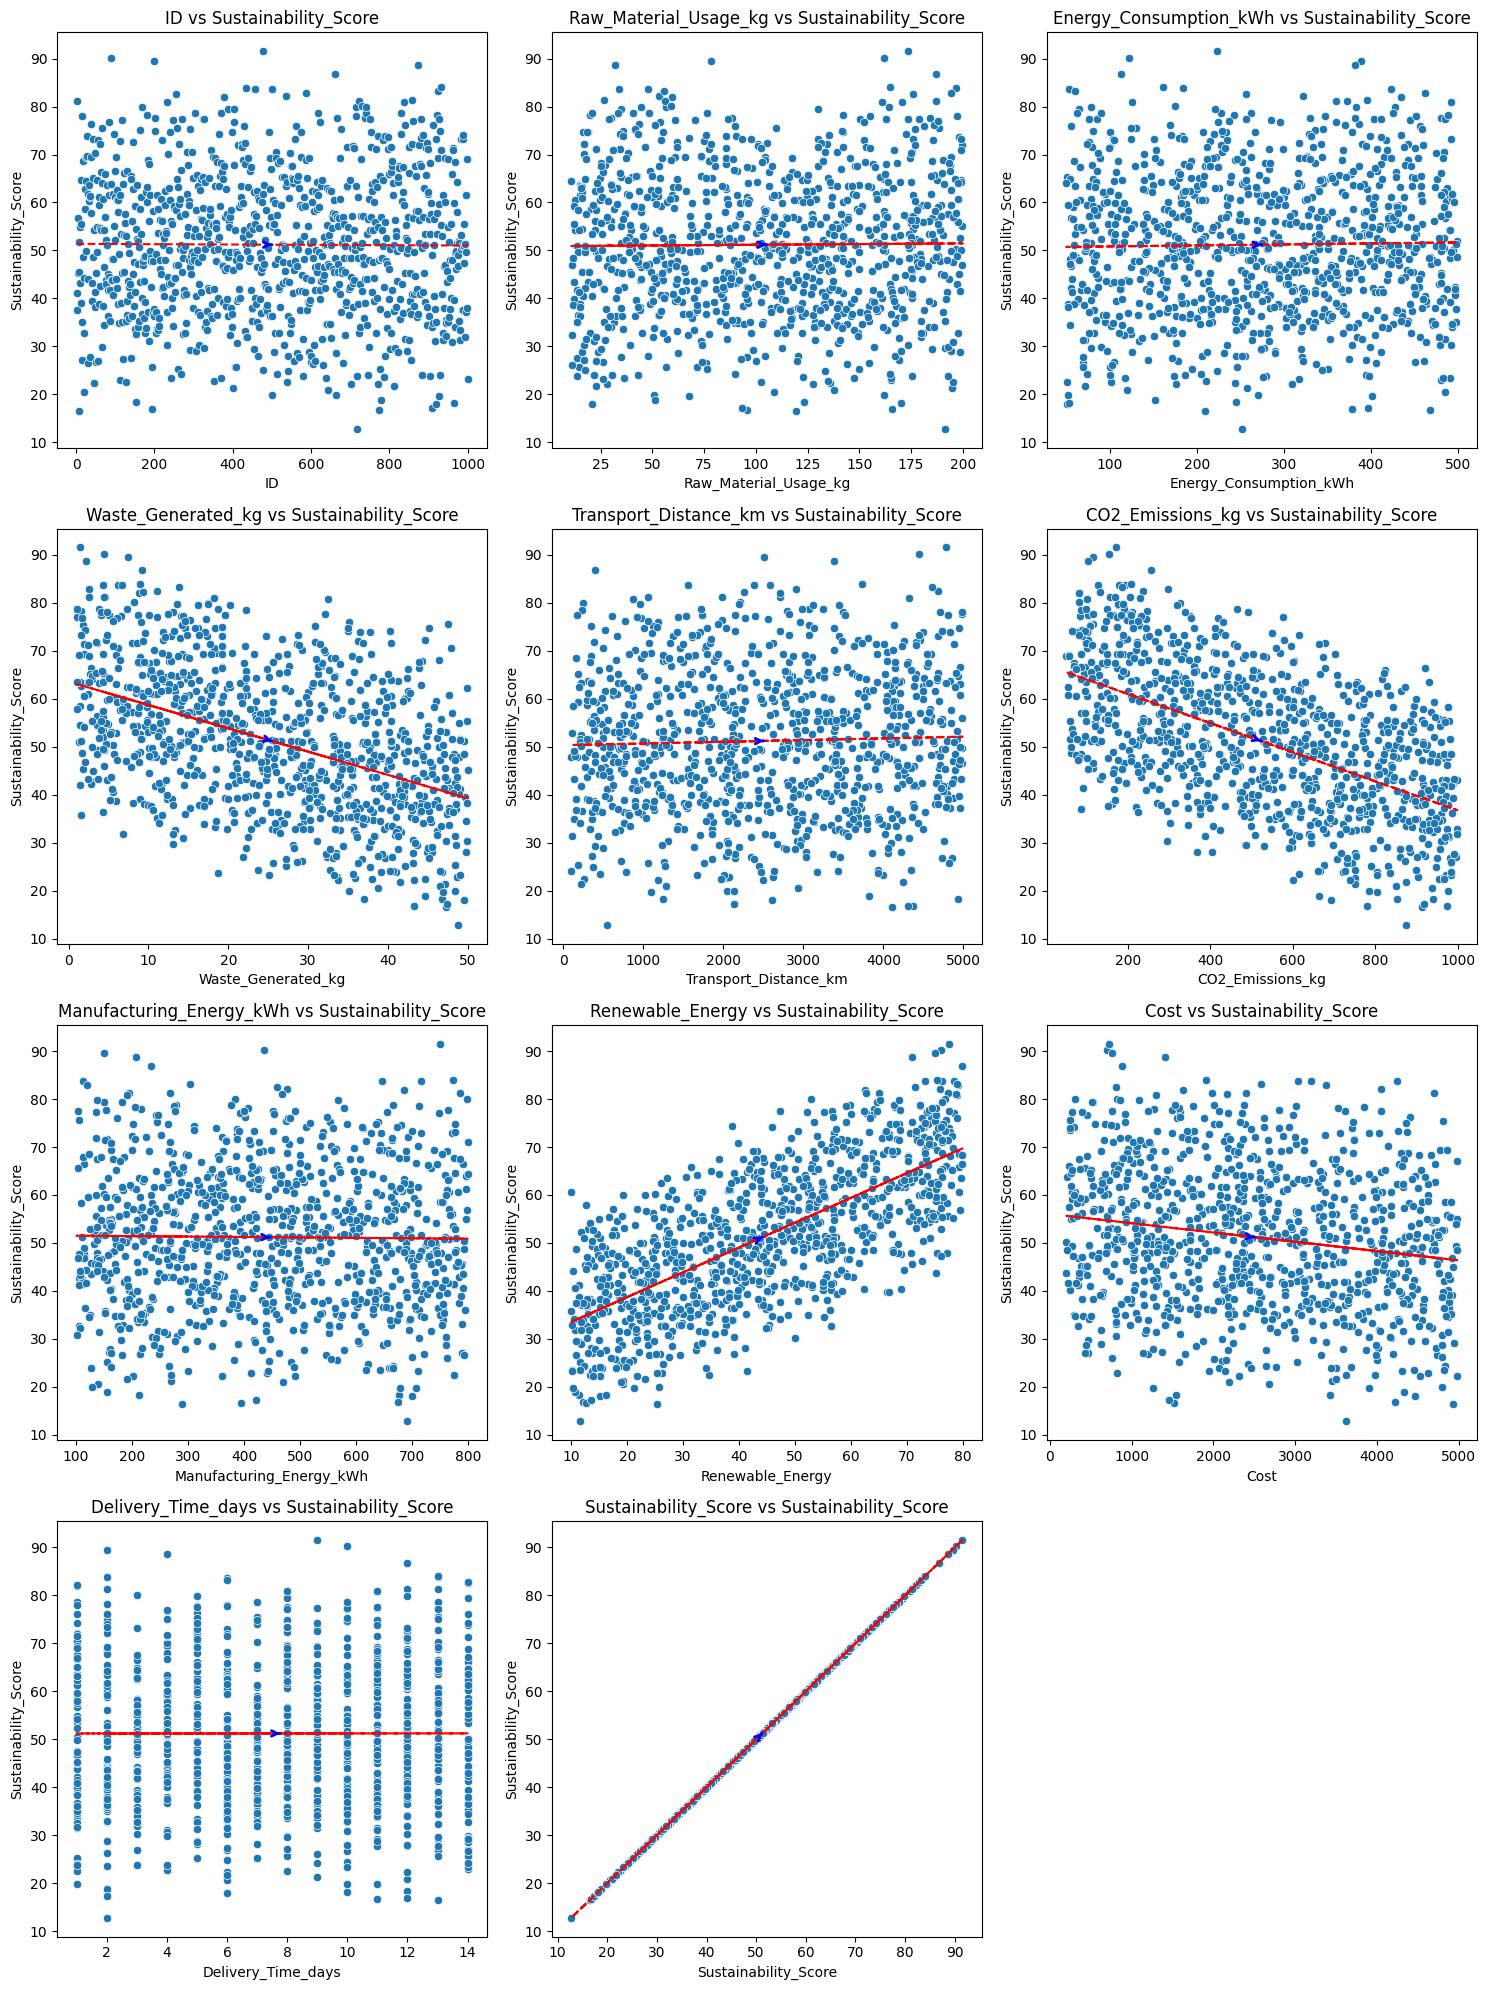

In [4]:
# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns
n_rows = (len(df_cor.columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create scatter plots for each numeric feature vs. Sustainability_Score
for i, feature in enumerate(df_cor.columns):
    sns.scatterplot(x=df_cor[feature], y=df['Sustainability_Score'], ax=axes[i])
    
    # Calculate the linear regression line (to get direction)
    x_vals = df_cor[feature]
    y_vals = df['Sustainability_Score']
    
    # Get slope (m) and intercept (b) for the line of best fit
    m, b = np.polyfit(x_vals, y_vals, 1)
    
    # Add the regression line
    axes[i].plot(x_vals, m*x_vals + b, color='red', linestyle='--')

    # Add an arrow to indicate the direction of the correlation
    # Positioning the arrow at the mean of the x and y values
    axes[i].annotate('', xy=(x_vals.mean() + 0.1, m * (x_vals.mean() + 0.1) + b),
                     xytext=(x_vals.mean(), m * x_vals.mean() + b),
                     arrowprops=dict(arrowstyle="->", color='blue', lw=2))

    axes[i].set_title(f'{feature} vs Sustainability_Score')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sustainability_Score')

# Hide any unused subplots
for i in range(len(df_cor.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

In [5]:
# Select features and target variable
X = df[['Waste_Generated_kg', 'CO2_Emissions_kg', 'Renewable_Energy', 'Cost']]
y = df['Sustainability_Score']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
import statsmodels.api as sm

# Add constant term to the features (intercept)
X_train_ols = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Print the summary of the regression
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Sustainability_Score   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 4.916e+09
Date:                  Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                          18:55:32   Log-Likelihood:                 3536.2
No. Observations:                   800   AIC:                            -7062.
Df Residuals:                       795   BIC:                            -7039.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0002      0.000   1.45e+05      0.000      59.999      60.001
Waste_Generated_kg    -0.4000    7.4e-06  -5.41e+04      0.000      -0.400      -0.400
CO2_Emissions_kg      -0.0300   3.79e-07  -7.92e+04      0.000      -0.030      -0.030
Renewable_Energy       0.5000   5.17e-06   9.67e+04      0.000       0.500       0.500
Cost                  -0.0020   7.52e-08  -2.66e+04      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      594.156   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.864
Skew:                           0.051   Prob(JB):                     2.45e-11
Kurtosis:                       1.794   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names from your DataFrame
features = X.columns

# Create and print the regression equation
equation = f"Sustainability_Score = {intercept:.4f}"
for coef, feature in zip(coefficients, features):
    equation += f" + ({coef:.4f} × {feature})"

print("Linear Regression Model Equation:")
print(equation)

Linear Regression Model Equation:
Sustainability_Score = 60.0002 + (-0.4000 × Waste_Generated_kg) + (-0.0300 × CO2_Emissions_kg) + (0.5000 × Renewable_Energy) + (-0.0020 × Cost)



Analyzing feature: Waste_Generated_kg
  Elasticity (slope b): -0.1587
  Log-scale breakpoint at: 2.8033
  Threshold value in Waste_Generated_kg: 16.50


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


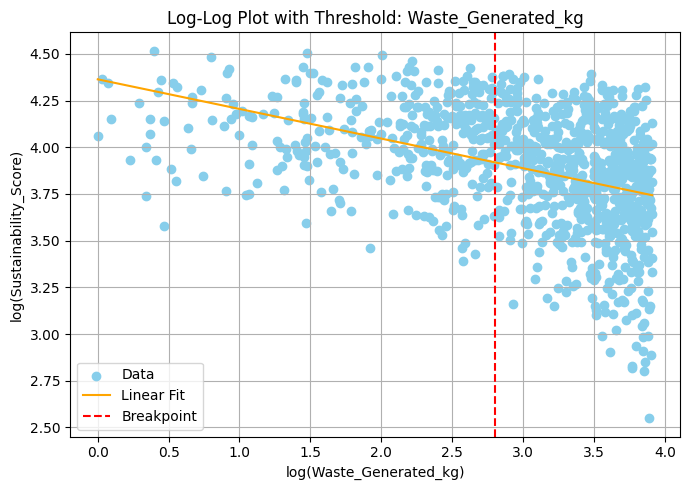


Analyzing feature: CO2_Emissions_kg
  Elasticity (slope b): -0.2337


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


  Log-scale breakpoint at: 6.0352
  Threshold value in CO2_Emissions_kg: 417.86


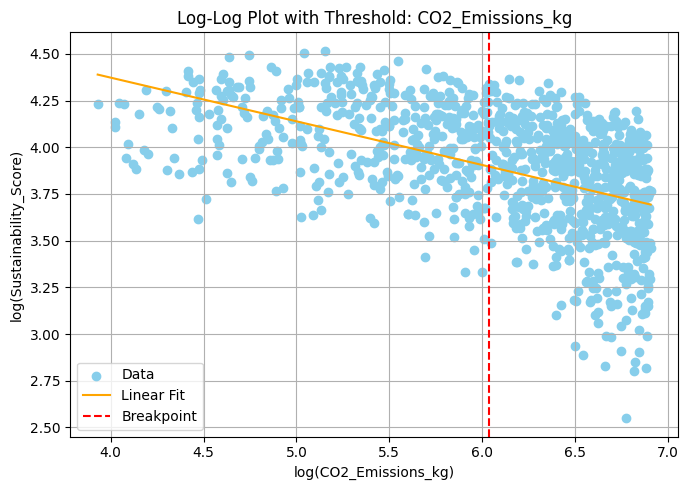


Analyzing feature: Renewable_Energy
  Elasticity (slope b): 0.3915
  Log-scale breakpoint at: 3.5287
  Threshold value in Renewable_Energy: 34.08


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


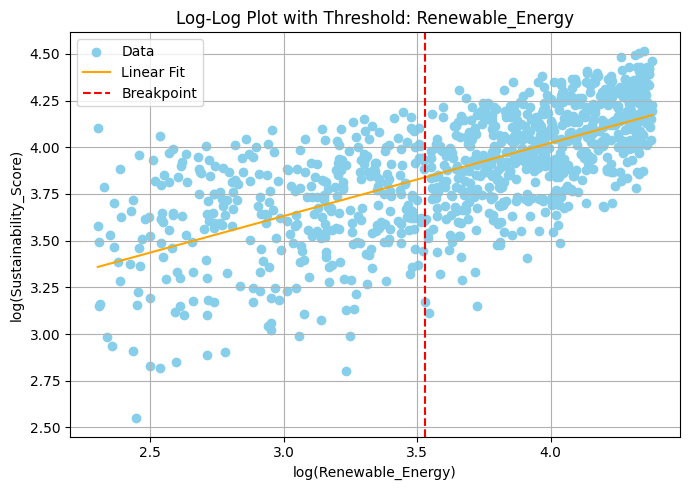


Analyzing feature: Cost
  Elasticity (slope b): -0.0695
  Log-scale breakpoint at: 7.9394
  Threshold value in Cost: 2805.64


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


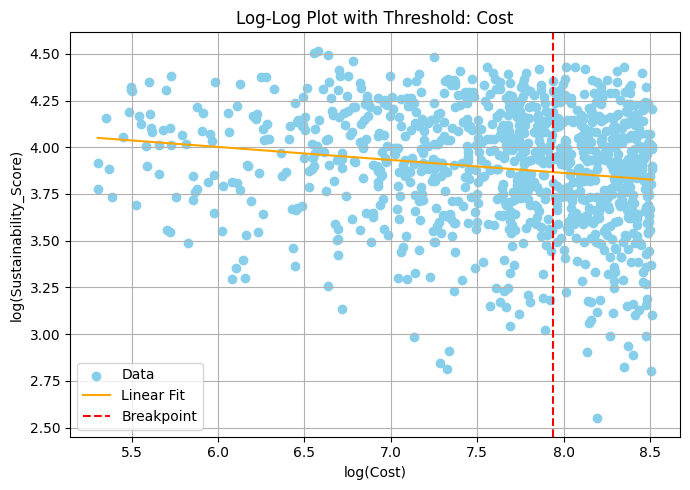

In [8]:
# List of selected features
features = ['Waste_Generated_kg', 'CO2_Emissions_kg', 'Renewable_Energy', 'Cost']

# Loop through each feature
for feature in features:
    print(f"\nAnalyzing feature: {feature}")

    # Filter out zero or negative values before applying log (avoid math errors)
    df_filtered = df[(df[feature] > 0) & (df['Sustainability_Score'] > 0)].copy()

    # Log transform
    df_filtered['log_X'] = np.log(df_filtered[feature])
    df_filtered['log_y'] = np.log(df_filtered['Sustainability_Score'])

    # Linear regression on log-log
    log_model = LinearRegression()
    log_model.fit(df_filtered[['log_X']], df_filtered['log_y'])

    slope = log_model.coef_[0]
    intercept = log_model.intercept_
    print(f"  Elasticity (slope b): {slope:.4f}")

    # Piecewise linear fit to find breakpoint
    pwlf_model = pwlf.PiecewiseLinFit(df_filtered['log_X'], df_filtered['log_y'])
    breaks = pwlf_model.fit(2)
    log_break = breaks[1]
    threshold = np.exp(log_break)

    print(f"  Log-scale breakpoint at: {log_break:.4f}")
    print(f"  Threshold value in {feature}: {threshold:.2f}")

    # Plot
    plt.figure(figsize=(7, 5))
    plt.scatter(df_filtered['log_X'], df_filtered['log_y'], color='skyblue', label='Data')
    x_vals = np.linspace(df_filtered['log_X'].min(), df_filtered['log_X'].max(), 100)
    y_vals = log_model.predict(x_vals.reshape(-1, 1))
    plt.plot(x_vals, y_vals, color='orange', label='Linear Fit')
    plt.axvline(log_break, color='red', linestyle='--', label='Breakpoint')
    plt.title(f'Log-Log Plot with Threshold: {feature}')
    plt.xlabel(f'log({feature})')
    plt.ylabel('log(Sustainability_Score)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
